# Pasos Previos

**HLS4ML necesita Vivado** (software para la síntesis y el análisis de diseños de lenguaje de descripción de hardware) para realizar una sintesis de alto nivel.

## Instalacion Vivado

una vez descargado el archivo, desde la tarminal en la carpeta donde se encuentra:
* **chmod +x Xilinx_Unified_2022.2_1014_8888_Lin64.bin** (dar permisos).
* **sudo ./Xilinx_Unified_2022.2_1014_8888_Lin64.bin** (para ejecutar y dar permiso de escribir en el archivo).
* seguir la instalacion en la Xilinx y escoger la opcion de **Vivado standar** (gratis).
* una vez terminara la instalacion, en la ventana emergente en **"obtain license" guardar el link** (no cerrar la ventana de vivado).
* abrir el archivo (link) e iniciar cesion.
* pasar a la pagina de **licencias del producto**.
* en **certicate based licence** selecionar los productos a ocupar (todos) y **Generate Node-Locked License**.
* selecione un Host, next y se **creara una licencia**.
* vamos a **create new licenses** y estara la licencia creada, la descargamos (guardar el archivo).
* abrimos la ventana de VIVADO y seleccionamos **load license** y abrimos la licencia descargada.
* abrimos de la terminal vivado (....)
* desde la terminal buscamos la ruta **./xilins/vivado/...**
* buscamos el archivo **settings64.sh**, una vez encontrado **source /tools/xilins/vivado/"version"/settings64.sh**
* escribimos desde la terminal **vivado** (deberia abrirse)
* volvemos al directorio de inicio (**cd**) buscamos la carpeta profile (**con ll**)
* usamos **nano .profile** y al final del archivo agregamos **source /tools/xilins/vivado/"version"/settings64.sh** y salimos con **ctrl+x y**
* reiniciamos el equipo
* abrimos de la terminal vivado




/tools/Xilinx

## instalacion de hls4ml

desde la terminal, con el venv activado y el kernel creado:
* pip install --upgrade pip
* pip install hls4ml[profiling]

ptras librerias a ocupar:
* pip install scikit-learn
* pip install pydot graphviz


# Modelo para jet tagging

### os

**os.environ** es para manipular las variables de entorno.  Las variables de entorno son parecido a un diccionario en el las llaves son cadena de textos (normalmente corresponden a *archivos, directorios y funciones comunes del sistema cuya ruta concreta puede variar*) a las cuales tienen asociado un valor.

Las variables de entorno no siempre equivalen a rutas de directorios, pueden remitir a otra clase de informacion:
* **TIME**: devuelve la hora actual del sistema
* **OS**: la version del sistema operativo
* **PATHEXT**: la lista de extensiones de archivos consideraras ejecutable
* **PATH**: para llamar otros archivos, compilador, interprete desde la carpeta del proyecto 

In [6]:
#@hidden_cell
os.path.exists("datos")

NameError: name 'os' is not defined

## Librerias

In [1]:
from tensorflow.keras.utils import to_categorical
#Convierte un vector de clase (enteros) en una matriz de clase binaria.
to_categorical([0, 1, 2, 3], num_classes=4)


2023-04-07 19:48:23.011833: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-07 19:48:23.143173: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-07 19:48:23.144018: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-07 19:48:23.922159: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]], dtype=float32)

In [2]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler


In [3]:
#Codifique las etiquetas de destino (Y) con un valor entre 0 y n_classes-1.
#tambien sirve para numericas
le = LabelEncoder()
le.fit(["a","b","c","f","a","a","c","b"])
le.classes_ #etiqueta de cada clase
print("transformamos ",["a","f","a","a","c","b","f","f"],"a",le.transform(["a","f","a","a","c","b","f","f"]))
print("y ahora lo invertimo",le.inverse_transform([0, 3, 0, 0, 2, 1, 3, 3]))


transformamos  ['a', 'f', 'a', 'a', 'c', 'b', 'f', 'f'] a [0 3 0 0 2 1 3 3]
y ahora lo invertimo ['a' 'f' 'a' 'a' 'c' 'b' 'f' 'f']


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1

**keras.Sequential** acepta una lista que contiene las capas que definen la arquitectura de la red neuronal. Los datos fluyen secuencialmente a través de cada capa hasta que llegan a la capa de salida final.

 **Sequential** es apropiado para una pila llanura de capas, donde cada capa tiene exactamente un tensor de entrada y un tensor de salida.


**El modelo secuencial no es apropiado cuando:**

* Su modelo tiene múltiples entradas o múltiples salidas
* Cualquiera de sus capas tiene múltiples entradas o múltiples salidas
* Necesitas compartir capas
* Quiere una topología no lineal (por ejemplo, una conexión residual, un modelo de varias ramas)

**layers Dense** es la capa regular de red neuronal profundamente conectada (*Es la capa más común y de uso frecuente*). cada neuron en la capa oculta recibe como imput todas las neuronas de la capa anterior



**layers Activation** corresponde a la funcion de activacion, una de ellas es la *funcion relu*

**layers BatchNormalization** para normalizar los imputs en las capas

**optimizers Adam** algoritmo de optimizacion recomendado para cjto de datos grandes junto com *rmsprop*.  son varaciones del descenso de gradinete capaces de adaptar el learning rate en funcion del gradiente y subgradiente

**regularizacion l1**. la regularizacion son metodos para reducir el sobreajuste de los modelos (memorizacion de los datos de entrenamiento). el objetivo de la penalizacion l1 y l2 es evitar que unas pocas neuronas dominen el comportamiento de la red y se fuerza a que las caracteristicas poco informativa tengas pesos proximos o iguales a cero

In [5]:
#from utils.callbacks import all_callbacks
#altermativa para utils.callbacks
from tensorflow.keras.callbacks import Callback

las **callback** se pueden pasar a metodos keras como fit, evaluate y predict para conectarse a las diversas etapas del ciclo de vida de entrenamiento e inferencia del modelo.

**Los Callbacks son útiles para tener visibilidad de los estados internos y las estadísticas del modelo durante el entrenamiento.**

In [6]:
from sklearn.metrics import accuracy_score

**accuracy score** es una metrica de precision en la clasificacion multietiqueta

### resumen

In [7]:
from tensorflow.keras.utils import to_categorical
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score

seed = 123
np.random.seed(seed)
import tensorflow as tf
tf.random.set_seed(seed)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1

##**
from tensorflow.keras.callbacks import Callback

## Carpeta para guardado

**falta por hacer**

## Datos

datos para **identificar los jets de particulas procedentes del LHC**, creados para el estudio de la inferencia de latencia ultrabaja con hls4ml.  utiliza 16 caracteristicas para identificar las 5 clases de jets:
* **quark**
* **gluon**
* **W boson**
* **Z boson**
* **top quark**

In [8]:
data = fetch_openml("hls4ml_lhc_jets_hlf")

/home/denis/Documentos/VSCode/environments/FPGA/lib/python3.10/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [9]:
X,y = data["data"], data["target"]

In [10]:
X.describe()

,zlogz,c1_b0_mmdt,c1_b1_mmdt,c1_b2_mmdt,c2_b1_mmdt,c2_b2_mmdt,d2_b1_mmdt,d2_b2_mmdt,d2_a1_b1_mmdt,d2_a1_b2_mmdt,m2_b1_mmdt,m2_b2_mmdt,n2_b1_mmdt,n2_b2_mmdt,mass_mmdt,multiplicity
count,830000.000000,830000.000000,830000.000000,8.300000e+05,830000.000000,8.300000e+05,830000.000000,830000.000000,830000.000000,830000.000000,830000.000000,830000.000000,830000.000000,830000.000000,830000.000000,830000.000000
mean,-2.865343,0.433322,0.037766,7.995166e-03,0.045608,7.609470e-03,1.295784,1.083618,1.295784,0.190380,0.090024,0.042460,0.281169,0.143915,75.153610,51.887834
std,0.580389,0.055448,0.029154,9.402567e-03,0.038657,1.217365e-02,0.458041,0.730066,0.458041,0.075417,0.036523,0.026396,0.084556,0.080461,55.612557,21.677036
min,-4.759511,0.091104,0.000073,4.472011e-08,0.000002,1.472518e-10,0.005866,0.000156,0.005866,0.000213,0.000077,0.000002,0.000643,0.000018,0.113449,6.000000
25%,-3.283773,0.419295,0.009977,3.371321e-04,0.015352,4.735599e-04,0.976546,0.485602,0.976546,0.125212,0.059285,0.018935,0.213851,0.071025,19.084184,36.000000
50%,-2.909453,0.452219,0.037919,5.950152e-03,0.036848,2.501090e-03,1.278506,0.983084,1.278506,0.192994,0.089061,0.038755,0.292299,0.139280,80.106373,48.000000
75%,-2.493677,0.468801,0.048510,8.193400e-03,0.062181,7.816279e-03,1.559999,1.505659,1.559999,0.251016,0.118213,0.062612,0.350496,0.210668,93.843903,64.000000
max,-0.438996,0.493779,0.165237,7.122659e-02,0.219034,1.079140e-01,3.968144,6.408456,3.968144,0.366573,0.187837,0.137693,0.449523,0.337616,573.616516,212.000000


In [11]:
y.describe

<bound method NDFrame.describe of 0         g
1         w
2         t
3         z
4         w
         ..
829995    z
829996    w
829997    t
829998    q
829999    g
Name: class, Length: 830000, dtype: category
Categories (5, object): ['g', 'q', 't', 'w', 'z']>

## Preprocesamiento

In [12]:
#para pasar a una variable numerica
le = LabelEncoder()
y = le.fit_transform(y)
#convertir la columna a una matrix de dimension 830.000x5 binaria (proceso similar al OneHotEncoder)
y = to_categorical(y,5)
#separacion de cjts
X_train_val, X_test, y_train_val, y_test = train_test_split(X,y, test_size=0.2, random_state=seed)

#estandarizar los datos
scaler = StandardScaler()
X_train_val = scaler.fit_transform(X_train_val)
X_test = scaler.transform(X_test)


In [13]:
y

array([[1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.]], dtype=float32)

In [14]:
#para devolver las tranbormaciones
reverse_categorical  = np.argmax(y, axis = 1)
le.inverse_transform(reverse_categorical)

array(['g', 'w', 't', ..., 't', 'q', 'g'], dtype=object)

In [15]:
#ver las clases q habian
le.classes_

array(['g', 'q', 't', 'w', 'z'], dtype=object)

**para guardar los archivos (sin ocupar os.path)**
* creamos la carpeta donde guardaremos los archivos
* copiamos la ruta

In [16]:
np.save("./datos/X_test.npy",X_test)
np.save("./datos/X_train_val.npy",X_train_val)
np.save("./datos/y_train_val.npy",y_train_val)
np.save("./datos/y_test.npy",y_test)


In [17]:
#para cargar los archivos
np.load("./datos/X_train_val.npy")

array([[-0.26374685,  0.3771841 , -0.75462548, ...,  1.20498132,
        -0.85883827, -0.13339045],
       [-0.91622077,  0.65025297,  1.49071158, ...,  0.76656815,
         1.34315011,  0.97333932],
       [-0.32388005,  0.47262411,  0.1644564 , ..., -0.54354993,
         0.23784779, -0.17950419],
       ...,
       [-0.6774237 ,  0.70518738,  0.02354086, ..., -0.93654569,
         0.09441983, -0.17950419],
       [ 0.4377064 ,  0.31869198,  0.13947707, ..., -1.34603783,
         0.21857823, -1.05566527],
       [-0.01696006,  0.48986445,  0.22074522, ..., -1.33963709,
         0.31316331, -0.82509656]])

## Modelo

la **NN** creada consta de 3 capas Densa (fll conectadas) con 64,32 y 32 neuronas.  Esta NN utiliza la activacion ReLu en la capa intermedia y softmax para la capa de salida

In [18]:
#creamos un modelo tipo sequencial
model = Sequential()
#agregamos la primera capa oculta y especificamos cuantos imputs tiene la red
model.add(Dense(64, input_shape=(16,), name="fc1", kernel_initializer = "lecun_uniform", kernel_regularizer=l1(0.0001)))
#definimos la funcion de activacion para esa capa
model.add(Activation(activation="relu", name = "relu1"))
#repetimos el proceso para la segunda capa
model.add(Dense(32, name="fc2", kernel_initializer = "lecun_uniform", kernel_regularizer=l1(0.0001)))
model.add(Activation(activation="relu", name = "relu2"))
#repetimos el proceso para la tercera capa
model.add(Dense(32, name="fc3", kernel_initializer = "lecun_uniform", kernel_regularizer=l1(0.0001)))
model.add(Activation(activation="relu", name = "relu3"))
#creamos la capa de salida
model.add(Dense(5, name = "output", kernel_initializer = "lecun_uniform", kernel_regularizer = l1(0.0001)))
model.add(Activation(activation="softmax", name = "softmax"))


In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 fc1 (Dense)                 (None, 64)                1088      
                                                                 
 relu1 (Activation)          (None, 64)                0         
                                                                 
 fc2 (Dense)                 (None, 32)                2080      
                                                                 
 relu2 (Activation)          (None, 32)                0         
                                                                 
 fc3 (Dense)                 (None, 32)                1056      
                                                                 
 relu3 (Activation)          (None, 32)                0         
                                                                 
 output (Dense)              (None, 5)                 1

el modelo tiene **4.389** Weight por entrenar

se entrenara el modelo durante 30 epocas y lo guardaremos en formato h5 y JSON

In [20]:
train = True
if train:
    #optimizacion
    adam = Adam(lr=0.0001)
    #adam es el tipo de optimizacion, categorical_crossentropy es la funcion que estamos optimizando y accuracy es para evaluar el desempeño
    #compile es para configurar el modelo para el entrenamiento
    model.compile(optimizer=adam, loss=["categorical_crossentropy"], metrics= ["accuracy"])
    #informacion que queremos durante el entrenamiento
    ##callback = Callback(stop_patience = 1000,
    ##                    lr_factor = 0.5,
    ##                    lr_patience = 10,
    ##                    lr_epsilon = 0.000001,
    ##                    lr_cooldown = 2,
    ##                    lr_minimum = 0.0000001,
    ##                    outputDir = "jet_tagging_keras",
    ##                    )
    #entrenamiento del modelo
    model.fit(X_train_val,y_train_val, batch_size = 1024, epochs=30,
              validation_split=0.25, shuffle=True)
    
    #guardar el entrenamiento
    model_json = model.to_json()
    #abrimos el directorio y damos permiso de editae ("w")
    with open("modelos/jet_tagging_keras/jet_tagging.json","w") as json_file:
        json_file.write(model_json)

#cargamos el mejor modelo
else:
    from tensorflow.keras.models import load_model
    model = load_model("modelos/jet_tagging_keras/KERAS_check_best_model.h5")
    

Epoch 1/30
487/487 [==============================] - 1s 2ms/step - loss: 0.9707 - accuracy: 0.6780 - val_loss: 0.8255 - val_accuracy: 0.7335
Epoch 2/30
487/487 [==============================] - 1s 1ms/step - loss: 0.8009 - accuracy: 0.7406 - val_loss: 0.7817 - val_accuracy: 0.7458
Epoch 3/30
487/487 [==============================] - 1s 1ms/step - loss: 0.7708 - accuracy: 0.7489 - val_loss: 0.7612 - val_accuracy: 0.7514
Epoch 4/30
487/487 [==============================] - 1s 1ms/step - loss: 0.7558 - accuracy: 0.7525 - val_loss: 0.7510 - val_accuracy: 0.7528
Epoch 5/30
487/487 [==============================] - 1s 1ms/step - loss: 0.7450 - accuracy: 0.7550 - val_loss: 0.7415 - val_accuracy: 0.7567
Epoch 6/30
487/487 [==============================] - 1s 1ms/step - loss: 0.7367 - accuracy: 0.7574 - val_loss: 0.7345 - val_accuracy: 0.7566
Epoch 7/30
487/487 [==============================] - 1s 1ms/step - loss: 0.7311 - accuracy: 0.7589 - val_loss: 0.7329 - val_accuracy: 0.7584
Epoch 

In [21]:
model

## Predicciones

In [22]:
y_keras = model.predict(X_test)

5188/5188 [==============================] - 2s 377us/step


In [23]:
y_keras

array([[1.3561407e-01, 4.7166425e-01, 2.7952917e-02, 2.0103514e-01,
        1.6373371e-01],
       [8.8719896e-04, 4.5798714e-03, 3.7953038e-02, 9.4133914e-01,
        1.5240715e-02],
       [2.0130084e-01, 2.0168708e-01, 2.5745034e-01, 1.7438827e-01,
        1.6517340e-01],
       ...,
       [7.6833428e-03, 1.0207500e-02, 1.0742198e-02, 2.8206116e-01,
        6.8930572e-01],
       [4.6558451e-02, 6.0013812e-02, 1.3026695e-01, 1.2081139e-01,
        6.4234948e-01],
       [8.2506663e-01, 1.5884824e-02, 1.5714879e-01, 1.1558643e-03,
        7.4382720e-04]], dtype=float32)

una prediccion es un arreglo de 5, donde cada uno corresponde a la "probabilidad" de ser esa categoria

### Curva ROC

**Las curvas ROC** suelen presentar una tasa de verdaderos positivos (TPR) en el eje Y y una tasa de falsos positivos (FPR) en el eje X. Esto significa que la esquina superior izquierda de la gráfica es el punto "ideal": un FPR de cero y un TPR de uno. Esto no es muy realista, pero significa que **un área bajo la curva (AUC) más grande suele ser mejor**. La "inclinación" de las curvas ROC también es importante, ya que es ideal para maximizar la TPR y minimizar la FPR

Las curvas ROC se utilizan normalmente en la clasificación binaria, donde TPR y FPR se pueden definir sin ambigüedades. En el caso de clasificación multiclase, se obtiene una noción de TPR o FPR solo después de binarizar la salida. Esto se puede hacer de 2 maneras diferentes:
* el esquema **One-vs-Rest** compara cada clase con todas las demás (asumidas como una)
* el esquema **One-vs-One** compara cada combinación única de clases por pares.


In [24]:
#prediciones
pred = np.argmax(y_keras,axis=1)
#valores reales
real = np.argmax(y_test, axis=1)
print("Accuracy: {}".format(accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_keras, axis=1))))


Accuracy: 0.7631746987951807


In [25]:
from sklearn.metrics import roc_curve 
#para binarizar
from sklearn.preprocessing import LabelBinarizer
#para la vizualizacion de la curva ROC
from sklearn.metrics import RocCurveDisplay

In [26]:
#LabelBinarizer en las predicciones
l_binarizer = LabelBinarizer()
y_onehot_test = l_binarizer.fit_transform(pred)
y_onehot_test

array([[0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0],
       ...,
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0]])

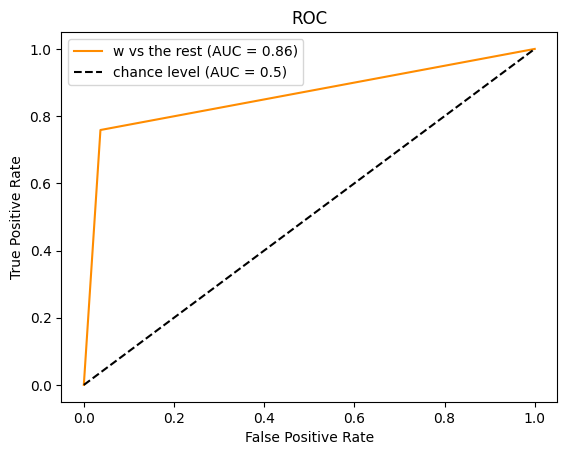

In [27]:
#con la columna voy movinedome por las clases
#para la clase w
class_interest = "w"
class_id = le.transform([class_interest])

RocCurveDisplay.from_predictions(
    y_test[:,class_id],
    y_onehot_test[:,class_id],
    name = f"{class_interest} vs the rest",
    color = "darkorange"
)

plt.plot([0,1], [0,1], "k--", label="chance level (AUC = 0.5)")
#plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC")
plt.legend()
plt.show()

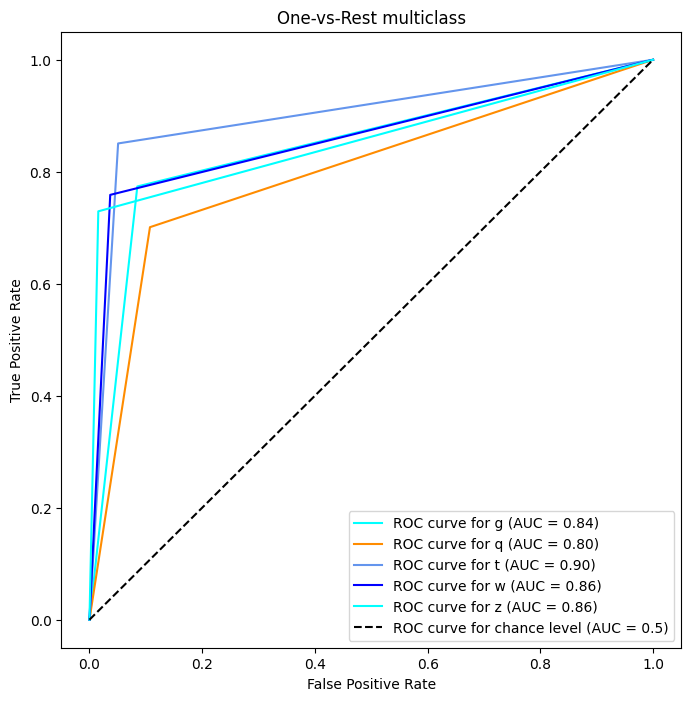

In [28]:
fig, ax = plt.subplots(figsize=(8, 8))

n_classes = len(le.classes_)
colors = ["aqua", "darkorange","cornflowerblue","blue","cyan"]

for class_id, color in zip(range(n_classes), colors):
    RocCurveDisplay.from_predictions(
        y_test[:,class_id],
        y_onehot_test[:,class_id],
        name = f"ROC curve for {le.inverse_transform([class_id])[0]}",
        color = color,
        ax=ax
        )

plt.plot([0, 1], [0, 1], "k--", label="ROC curve for chance level (AUC = 0.5)")
#plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest multiclass")
plt.legend()
plt.show()

**el área bajo la curva (AUC)**, que es un cálculo de la relación entre los falsos positivos y los verdaderos positivos. Cuanto mayor sea el AUC, mejor será el modelo en general. Sin embargo, también es importante inspeccionar la "inclinación" de la curva, ya que describe la maximización de la tasa de verdaderos positivos mientras se minimiza la tasa de falsos positivos.



## HLS

In [29]:
import hls4ml
import yaml

/home/denis/Documentos/VSCode/environments/FPGA/lib/python3.10/site-packages/hls4ml/converters/__init__.py:16: UserWarning: WARNING: Pytorch converter is not enabled!
  warnings.warn("WARNING: Pytorch converter is not enabled!")


se debe dar a conocer la ruta de **vivado** dentro del entorno python

**POR HACER**

HSL4ML nos permite manipular la configuracion del modelo

In [30]:
config = hls4ml.utils.config_from_keras_model(model, granularity="name")

Interpreting Sequential
Topology:
Layer name: fc1_input, layer type: Input
Layer name: fc1, layer type: Dense
  -> Activation (linear), layer name: fc1
Layer name: relu1, layer type: Activation
Layer name: fc2, layer type: Dense
  -> Activation (linear), layer name: fc2
Layer name: relu2, layer type: Activation
Layer name: fc3, layer type: Dense
  -> Activation (linear), layer name: fc3
Layer name: relu3, layer type: Activation
Layer name: output, layer type: Dense
  -> Activation (linear), layer name: output
Layer name: softmax, layer type: Activation


la devolucion es un diccionario que almacena la configuracion del modelo

In [32]:
config

{'Model': {'Precision': 'ap_fixed<16,6>',
  'ReuseFactor': 1,
  'Strategy': 'Latency'},
 'LayerName': {'fc1_input': {'Precision': {'result': 'ap_fixed<16,6>'}},
  'fc1': {'Precision': {'weight': 'ap_fixed<16,6>',
    'bias': 'ap_fixed<16,6>',
    'result': 'ap_fixed<16,6>'},
   'ReuseFactor': 1},
  'fc1_linear': {'Precision': 'ap_fixed<16,6>',
   'ReuseFactor': 1,
   'table_size': 1024,
   'table_t': 'ap_fixed<18,8>'},
  'relu1': {'Precision': 'ap_fixed<16,6>',
   'ReuseFactor': 1,
   'table_size': 1024,
   'table_t': 'ap_fixed<18,8>'},
  'fc2': {'Precision': {'weight': 'ap_fixed<16,6>',
    'bias': 'ap_fixed<16,6>',
    'result': 'ap_fixed<16,6>'},
   'ReuseFactor': 1},
  'fc2_linear': {'Precision': 'ap_fixed<16,6>',
   'ReuseFactor': 1,
   'table_size': 1024,
   'table_t': 'ap_fixed<18,8>'},
  'relu2': {'Precision': 'ap_fixed<16,6>',
   'ReuseFactor': 1,
   'table_size': 1024,
   'table_t': 'ap_fixed<18,8>'},
  'fc3': {'Precision': {'weight': 'ap_fixed<16,6>',
    'bias': 'ap_fixed<1

In [34]:
config.keys()

dict_keys(['Model', 'LayerName'])

In [35]:
config["Model"]

{'Precision': 'ap_fixed<16,6>', 'ReuseFactor': 1, 'Strategy': 'Latency'}

In [36]:
#es otro diccionario
config["LayerName"]

{'fc1_input': {'Precision': {'result': 'ap_fixed<16,6>'}},
 'fc1': {'Precision': {'weight': 'ap_fixed<16,6>',
   'bias': 'ap_fixed<16,6>',
   'result': 'ap_fixed<16,6>'},
  'ReuseFactor': 1},
 'fc1_linear': {'Precision': 'ap_fixed<16,6>',
  'ReuseFactor': 1,
  'table_size': 1024,
  'table_t': 'ap_fixed<18,8>'},
 'relu1': {'Precision': 'ap_fixed<16,6>',
  'ReuseFactor': 1,
  'table_size': 1024,
  'table_t': 'ap_fixed<18,8>'},
 'fc2': {'Precision': {'weight': 'ap_fixed<16,6>',
   'bias': 'ap_fixed<16,6>',
   'result': 'ap_fixed<16,6>'},
  'ReuseFactor': 1},
 'fc2_linear': {'Precision': 'ap_fixed<16,6>',
  'ReuseFactor': 1,
  'table_size': 1024,
  'table_t': 'ap_fixed<18,8>'},
 'relu2': {'Precision': 'ap_fixed<16,6>',
  'ReuseFactor': 1,
  'table_size': 1024,
  'table_t': 'ap_fixed<18,8>'},
 'fc3': {'Precision': {'weight': 'ap_fixed<16,6>',
   'bias': 'ap_fixed<16,6>',
   'result': 'ap_fixed<16,6>'},
  'ReuseFactor': 1},
 'fc3_linear': {'Precision': 'ap_fixed<16,6>',
  'ReuseFactor': 1,
 

In [38]:
config["LayerName"].keys()

dict_keys(['fc1_input', 'fc1', 'fc1_linear', 'relu1', 'fc2', 'fc2_linear', 'relu2', 'fc3', 'fc3_linear', 'relu3', 'output', 'output_linear', 'softmax'])

In [37]:
config["LayerName"]["fc1"]

{'Precision': {'weight': 'ap_fixed<16,6>',
  'bias': 'ap_fixed<16,6>',
  'result': 'ap_fixed<16,6>'},
 'ReuseFactor': 1}

In [41]:
config["LayerName"]["fc1_linear"]

{'Precision': 'ap_fixed<16,6>',
 'ReuseFactor': 1,
 'table_size': 1024,
 'table_t': 'ap_fixed<18,8>'}

con esto se puede manipular cada parametro de capa por separado

ahora importamos el modulo de **generacion de perfiles**

In [42]:
from hls4ml.model import profiling

creamos el modelo en HLS

In [45]:
hls_model_std = hls4ml.converters.convert_from_keras_model(model, hls_config=config, output_dir="./modelos")

Interpreting Sequential
Topology:
Layer name: fc1_input, layer type: InputLayer, input shapes: [[None, 16]], output shape: [None, 16]
Layer name: fc1, layer type: Dense, input shapes: [[None, 16]], output shape: [None, 64]
Layer name: relu1, layer type: Activation, input shapes: [[None, 64]], output shape: [None, 64]
Layer name: fc2, layer type: Dense, input shapes: [[None, 64]], output shape: [None, 32]
Layer name: relu2, layer type: Activation, input shapes: [[None, 32]], output shape: [None, 32]
Layer name: fc3, layer type: Dense, input shapes: [[None, 32]], output shape: [None, 32]
Layer name: relu3, layer type: Activation, input shapes: [[None, 32]], output shape: [None, 32]
Layer name: output, layer type: Dense, input shapes: [[None, 32]], output shape: [None, 5]
Layer name: softmax, layer type: Softmax, input shapes: [[None, 5]], output shape: [None, 5]
Creating HLS model


el parametro (opcional) **fpga_part** es para especificar el FPGA al que queremos apuntar

In [44]:
hls_model_std

representacion del HLS creada

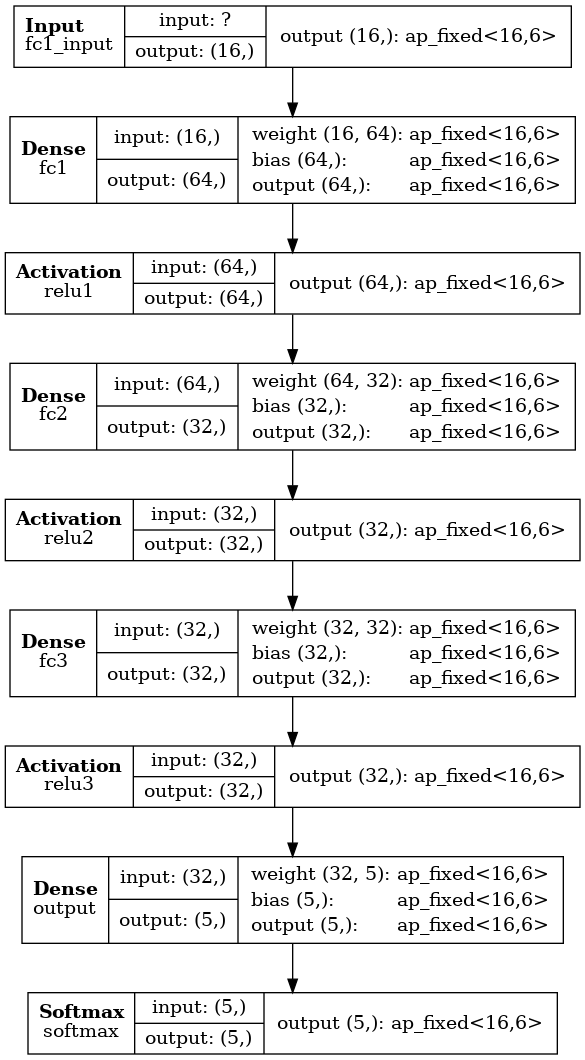

In [48]:
hls4ml.utils.plot_model(hls_model_std, show_shapes=True, show_precision=True, to_file=None)


si sale error.

**Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work**

probar con 

* pip install pydot
* pip install pydotplus
* sudo apt-get install graphviz


ahora para la representacion grafica de los valores numericos utilizados para los pesos

**Problema con las variables globales (os)**

Interpreting Sequential
Topology:
Layer name: fc1_input, layer type: InputLayer, input shapes: [[None, 16]], output shape: [None, 16]
Layer name: fc1, layer type: Dense, input shapes: [[None, 16]], output shape: [None, 64]
Layer name: relu1, layer type: Activation, input shapes: [[None, 64]], output shape: [None, 64]
Layer name: fc2, layer type: Dense, input shapes: [[None, 64]], output shape: [None, 32]
Layer name: relu2, layer type: Activation, input shapes: [[None, 32]], output shape: [None, 32]
Layer name: fc3, layer type: Dense, input shapes: [[None, 32]], output shape: [None, 32]
Layer name: relu3, layer type: Activation, input shapes: [[None, 32]], output shape: [None, 32]
Layer name: output, layer type: Dense, input shapes: [[None, 32]], output shape: [None, 5]
Layer name: softmax, layer type: Softmax, input shapes: [[None, 5]], output shape: [None, 5]
Creating HLS model
Profiling weights (before optimization)
Profiling weights (final / after optimization)
Profiling activations

OSError: libdl.so: cannot open shared object file: No such file or directory

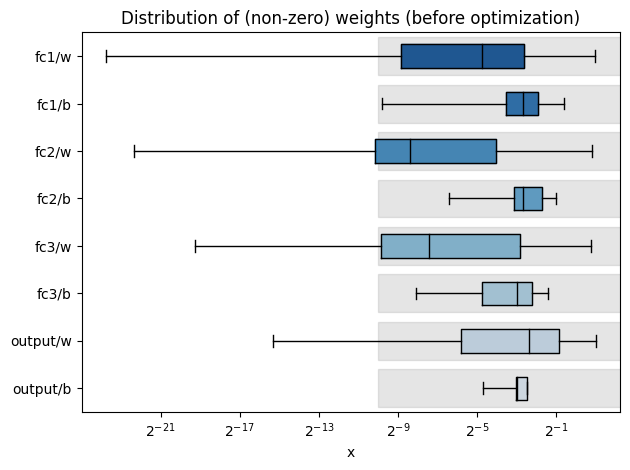

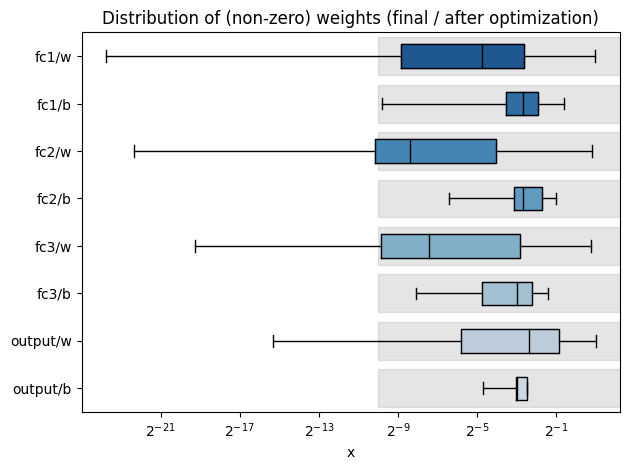

In [56]:
profiling.numerical(model = model, hls_model=hls_model_std, X=X_test)


los recuadros grises indican el rango que podemos cubrir con el ancho de bit elegido

el argumento plot tiene como opcion:
* boxplot (predeterminada)
* histogram
* violinplot

Interpreting Sequential
Topology:
Layer name: fc1_input, layer type: InputLayer, input shapes: [[None, 16]], output shape: [None, 16]
Layer name: fc1, layer type: Dense, input shapes: [[None, 16]], output shape: [None, 64]
Layer name: relu1, layer type: Activation, input shapes: [[None, 64]], output shape: [None, 64]
Layer name: fc2, layer type: Dense, input shapes: [[None, 64]], output shape: [None, 32]
Layer name: relu2, layer type: Activation, input shapes: [[None, 32]], output shape: [None, 32]
Layer name: fc3, layer type: Dense, input shapes: [[None, 32]], output shape: [None, 32]
Layer name: relu3, layer type: Activation, input shapes: [[None, 32]], output shape: [None, 32]
Layer name: output, layer type: Dense, input shapes: [[None, 32]], output shape: [None, 5]
Layer name: softmax, layer type: Softmax, input shapes: [[None, 5]], output shape: [None, 5]
Creating HLS model
Profiling weights (before optimization)
Profiling weights (final / after optimization)
Profiling activations

OSError: libdl.so: cannot open shared object file: No such file or directory

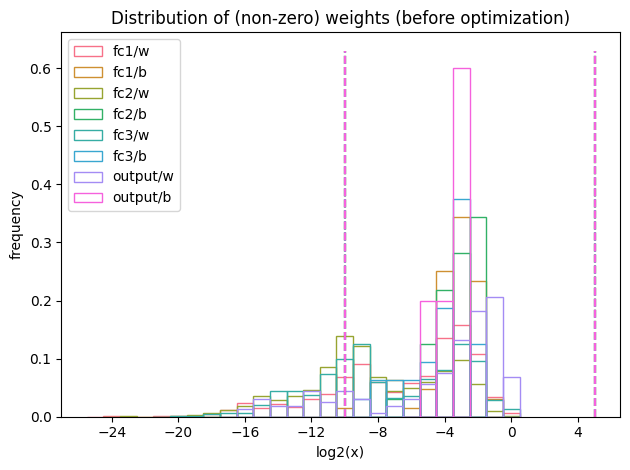

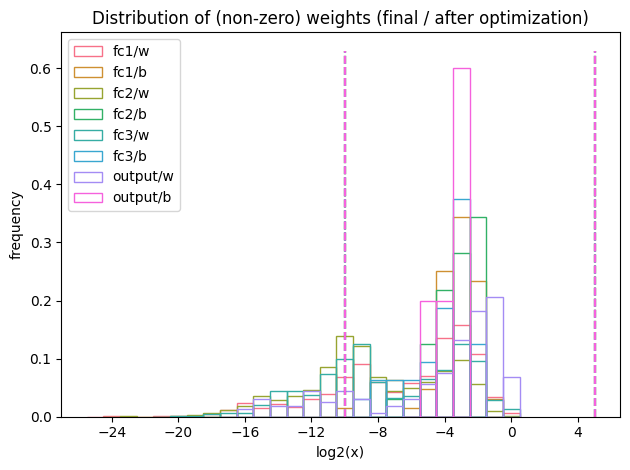

In [57]:
profiling.numerical(model = model, hls_model=hls_model_std, X=X_test, plot="histogram")


## Comparacion de modelos

primero se debe compilar la representacion HLS y ejecutar algunas predicciones con los datos de prueba

In [58]:
hls_model_std.compile()
y_hls_std = hls_model_std.predict(np.ascontiguousarray(X_test))

Writing HLS project
Done


OSError: libdl.so: cannot open shared object file: No such file or directory

In [59]:
y_hls_std

NameError: name 'y_hls_std' is not defined